# HVAC Energy Optimization - EDA & Statistical Analysis

This notebook explores how smart automation affects HVAC energy consumption using a dataset of 5000 records. We follow a structured approach starting from data inspection to advanced analytics and statistical testing. The ultimate goal is to identify whether smart HVAC systems save more energy than traditional ones.

---

### **Step 1: Load Dataset & Initial Checks**

In this step, we load the HVAC dataset, check for missing values, and understand the overall structure of the data.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr
import statsmodels.api as sm

# Load the HVAC dataset
df = pd.read_csv("./data/HVAC_dataset.csv")  

# Display first few rows
print("\n🔹 First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Summary statistics
print("\n🔹 Summary Statistics:")
print(df.describe())



🔹 First 5 rows of the dataset:
  Building_ID     Location Building_Type  Pre_Automation_Energy_kWh  \
0       B0001       London        Office              191283.295897   
1       B0002      Toronto      Hospital               54927.634439   
2       B0003      Toronto         Hotel              199353.275543   
3       B0004      Toronto         Hotel              237490.117600   
4       B0005  Mississauga      Hospital              185475.236845   

   Post_Automation_Energy_kWh  Peak_Demand_Reduction_MW HVAC_System_Type  \
0               123296.548816                 26.131322      Traditional   
1                49098.849239                 34.432871         Upgraded   
2               166788.839369                 28.636484         Upgraded   
3               137780.917205                 33.940601  Smart Automated   
4               137102.909497                 19.614157      Traditional   

   Automation_Efficiency_%  Cost_Savings_$  CO2_Reduction_Metric_Tons  
0           

## **Step 2: Exploratory Data Analysis (EDA)**

In this section, we visualize distributions and relationships between key variables before applying statistical tests.


### **Step 2.1 – Cause-Effect Mapping of HVAC Energy Waste**

This table connects root causes to observable inefficiencies and sets the foundation for our statistical analysis.

| **Cause**                          | **Effect on Energy Waste**                                                                 |
|------------------------------------|--------------------------------------------------------------------------------------------|
| Manual HVAC control                | HVAC systems run at full load even when occupancy is low → overcooling/heating             |
| Outdated control algorithms        | Cannot adapt to changing weather/occupancy → unnecessary energy usage                      |
| Lack of sensors and real-time data | No feedback loop → systems don’t respond dynamically → energy is wasted                    |
| Poor insulation or building envelope | Higher heating/cooling demands → HVAC works harder than necessary                         |
| Operator unawareness/training      | Improper thermostat settings or manual overrides → persistent inefficiency                 |


#### **Distribution of HVAC System Types**
We use a **count plot** to visualize the **number of instances of each HVAC system type** in the dataset.

C:\Users\bhupe\AppData\Local\Temp\ipykernel_6484\2983097689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="HVAC_System_Type", data=df, palette="coolwarm")


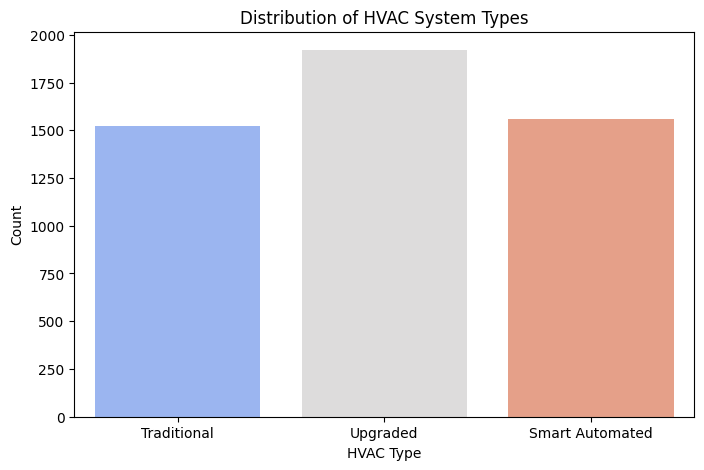

In [2]:
# 🔹 Countplot: Distribution of HVAC System Types
plt.figure(figsize=(8, 5))
sns.countplot(x="HVAC_System_Type", data=df, palette="coolwarm")
plt.title("Distribution of HVAC System Types")
plt.xlabel("HVAC Type")
plt.ylabel("Count")
plt.show()

#### **Histogram: Distribution of Peak Demand Reduction (MW)**
This visualization helps us understand the **distribution of Peak Demand Reduction (MW)** across different buildings.


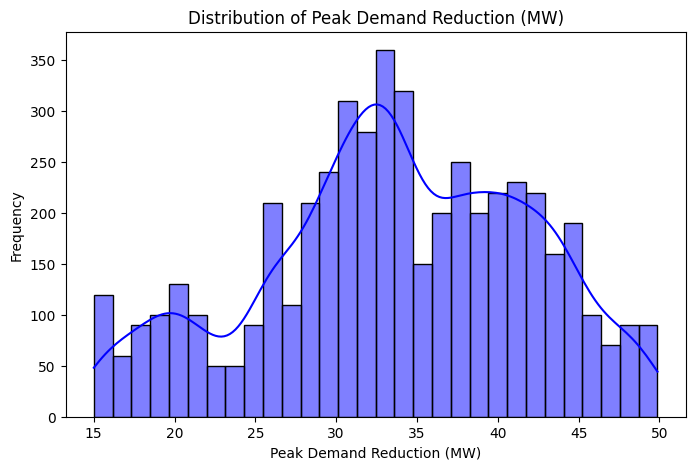

In [3]:
# 🔹 Histogram: Distribution of Peak Demand Reduction (MW)
plt.figure(figsize=(8, 5))
sns.histplot(df["Peak_Demand_Reduction_MW"], bins=30, kde=True, color="blue")
plt.title("Distribution of Peak Demand Reduction (MW)")
plt.xlabel("Peak Demand Reduction (MW)")
plt.ylabel("Frequency")
plt.show()

#### **Correlation Heatmap**
The **correlation heatmap** visually represents the relationships between **numerical variables** in the dataset.

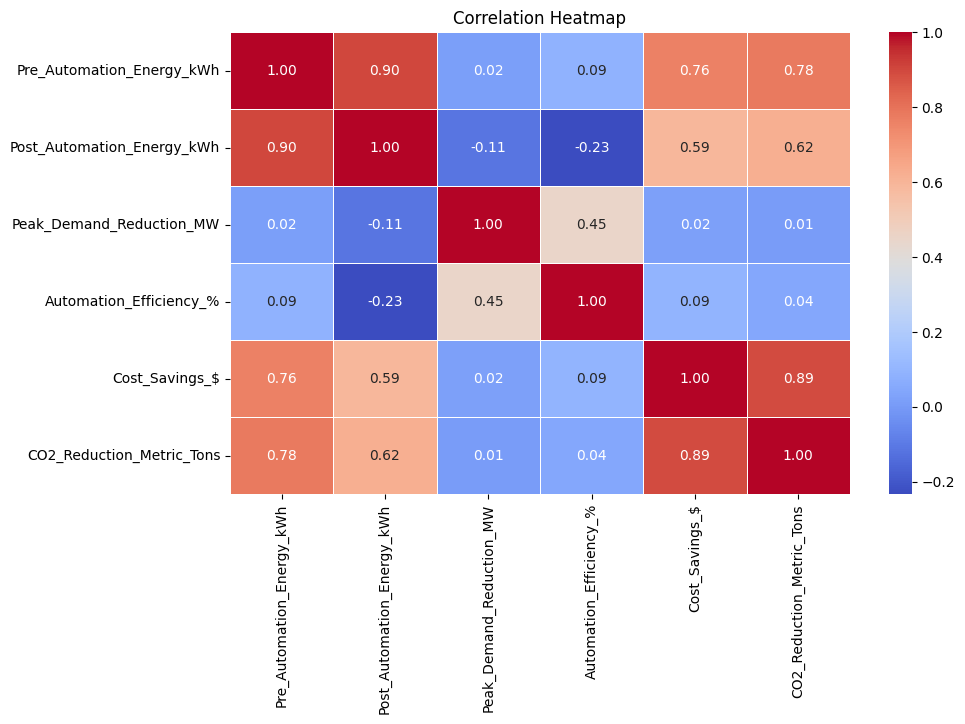

In [4]:
# 🔹 Correlation Heatmap
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### **Step 3: Statistical Analysis - T-Test, ANOVA & A/B Testing**

We now assess whether the type of HVAC system significantly affects energy savings and demand reduction. We treat this as an A/B test comparing Smart vs Traditional systems.


#### **T-Test: Comparing Energy Savings Between Smart Automated vs. Traditional HVAC**
A **T-Test (Independent Two-Sample T-Test)** is used to **compare the average energy savings** of **Smart Automated HVAC** vs **Traditional HVAC**.

In [5]:
# 🔹 T-Test: Comparing Energy Savings Between Smart Automated vs Traditional HVAC
smart_automation = df[df["HVAC_System_Type"] == "Smart Automated"]["Pre_Automation_Energy_kWh"] - df[df["HVAC_System_Type"] == "Smart Automated"]["Post_Automation_Energy_kWh"]
traditional_hvac = df[df["HVAC_System_Type"] == "Traditional"]["Pre_Automation_Energy_kWh"] - df[df["HVAC_System_Type"] == "Traditional"]["Post_Automation_Energy_kWh"]

# Perform independent t-test
t_stat, p_value = ttest_ind(smart_automation, traditional_hvac, equal_var=False)
print(f"\n🔹 T-Test Results: t-statistic = {t_stat:.3f}, p-value = {p_value:.5f}")
if p_value < 0.05:
    print("✅ Significant difference: Smart automation saves more energy than traditional HVAC.")
else:
    print("❌ No significant difference detected.")


🔹 T-Test Results: t-statistic = 34.725, p-value = 0.00000
✅ Significant difference: Smart automation saves more energy than traditional HVAC.


#### **ANOVA: Checking if Peak Demand Reduction differs across HVAC types**
**ANOVA (Analysis of Variance)** is used to determine whether there are **statistically significant differences** in **Peak Demand Reduction (MW)** across **different HVAC system types**.

In [6]:
# 🔹 ANOVA: Checking if Peak Demand Reduction differs across HVAC types
anova_stat, anova_p = f_oneway(
    df[df["HVAC_System_Type"] == "Smart Automated"]["Peak_Demand_Reduction_MW"],
    df[df["HVAC_System_Type"] == "Traditional"]["Peak_Demand_Reduction_MW"],
    df[df["HVAC_System_Type"] == "Upgraded"]["Peak_Demand_Reduction_MW"]
)
print(f"\n🔹 ANOVA Results: F-statistic = {anova_stat:.3f}, p-value = {anova_p:.5f}")
if anova_p < 0.05:
    print("✅ Significant differences exist in Peak Demand Reduction across HVAC types.")
else:
    print("❌ No significant difference detected.")


🔹 ANOVA Results: F-statistic = 2542.178, p-value = 0.00000
✅ Significant differences exist in Peak Demand Reduction across HVAC types.


### **Step 4: Regression Analysis**
This step involves building a **regression model** to analyze the relationship between **Automation Efficiency (%), HVAC System Type, and Peak Demand Reduction (MW)**.

---

#### **Converting Categorical HVAC System Types into Numerical Values**
Since regression models require **numerical input**, we convert **HVAC system types** into numeric values:

- **Traditional HVAC** → `0`
- **Upgraded HVAC** → `1`
- **Smart Automated HVAC** → `2`

In [7]:
# Convert categorical HVAC system type into numerical values for regression
df["HVAC_System_Type_Num"] = df["HVAC_System_Type"].map({"Traditional": 0, "Upgraded": 1, "Smart Automated": 2})

# Define independent variables (X) and dependent variable (Y)
X = df[["Automation_Efficiency_%", "HVAC_System_Type_Num"]]
X = sm.add_constant(X)  # Add intercept for regression model
y = df["Peak_Demand_Reduction_MW"]

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display regression summary
print("\n🔹 Regression Analysis Results:")
print(model.summary())



🔹 Regression Analysis Results:
                               OLS Regression Results                               
Dep. Variable:     Peak_Demand_Reduction_MW   R-squared:                       0.499
Model:                                  OLS   Adj. R-squared:                  0.499
Method:                       Least Squares   F-statistic:                     2492.
Date:                      Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                              23:50:02   Log-Likelihood:                -15944.
No. Observations:                      5000   AIC:                         3.189e+04
Df Residuals:                          4997   BIC:                         3.191e+04
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

### **Step 5: Visualizing Key Findings**
This step involves using **scatter plots and box plots** to analyze how **Automation Efficiency (%)** and **HVAC System Type** influence **Peak Demand Reduction (MW)**.

---

#### **Scatter Plot: Peak Demand Reduction vs. Automation Efficiency**
A **scatter plot** helps visualize the relationship between **Automation Efficiency (%)** and **Peak Demand Reduction (MW)**, categorized by HVAC System Type.

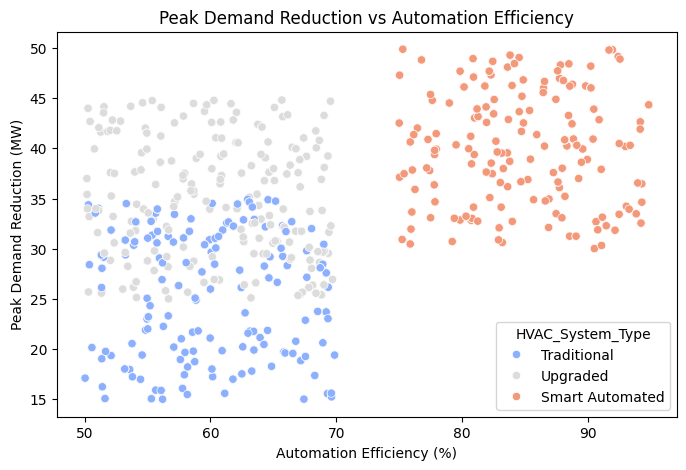

In [8]:
# 🔹 Scatter plot: Peak Demand Reduction vs Automation Efficiency
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Automation_Efficiency_%"], y=df["Peak_Demand_Reduction_MW"], hue=df["HVAC_System_Type"], palette="coolwarm")
plt.title("Peak Demand Reduction vs Automation Efficiency")
plt.xlabel("Automation Efficiency (%)")
plt.ylabel("Peak Demand Reduction (MW)")
plt.show()

#### **Boxplot: Peak Demand Reduction for Different HVAC Systems**
A **boxplot** helps visualize the distribution of **Peak Demand Reduction (MW)** across different **HVAC System Types**.

C:\Users\bhupe\AppData\Local\Temp\ipykernel_6484\1355636035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="HVAC_System_Type", y="Peak_Demand_Reduction_MW", data=df, palette="coolwarm")


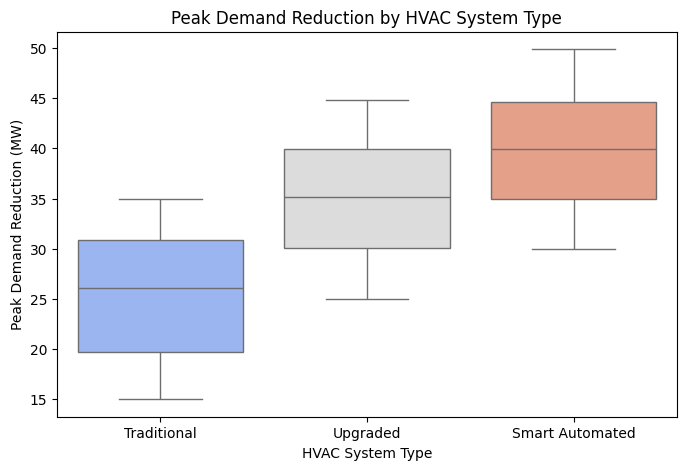

In [9]:
# 🔹 Boxplot: Peak Demand Reduction for Different HVAC Systems
plt.figure(figsize=(8, 5))
sns.boxplot(x="HVAC_System_Type", y="Peak_Demand_Reduction_MW", data=df, palette="coolwarm")
plt.title("Peak Demand Reduction by HVAC System Type")
plt.xlabel("HVAC System Type")
plt.ylabel("Peak Demand Reduction (MW)")
plt.show()

### **Step 6: Feature Engineering**
This step involves **creating new features** to enhance the dataset and improve analysis.

---

#### **Creating a New Column for Energy Savings (%)**
We calculate the **percentage of energy saved** before and after automation.

In [10]:
# Feature Engineering: Creating a new column for Energy Savings %
df['Energy_Savings_%'] = ((df['Pre_Automation_Energy_kWh'] - df['Post_Automation_Energy_kWh']) / df['Pre_Automation_Energy_kWh']) * 100

### **Step 6.1: Adding Simulated Weather & Occupancy Data**
To better understand HVAC energy consumption, we introduce **two new features**:
1. **External Temperature (°C)** → Simulates how ambient temperature affects energy consumption.
2. **Building Occupancy (%)** → Represents how the number of people in a building impacts HVAC usage.

---

#### **Generating Simulated Data**
Since real-world data might not be available, we use **randomly generated values** within realistic ranges:

In [11]:
# Simulated Weather & Occupancy Data
np.random.seed(42)
df['External_Temperature_C'] = np.random.uniform(5, 35, df.shape[0])  # Random temperatures (5°C - 35°C)
df['Building_Occupancy_%'] = np.random.uniform(10, 100, df.shape[0])  # Random occupancy rates (10% - 100%)

### **Step 6.2: Verifying the Feature Engineering**
After adding new features like **Energy Savings (%), External Temperature (°C), and Building Occupancy (%)**, we print the updated dataset to verify the changes.

In [12]:
# Display updated dataset
print("\n🔹 Updated Dataset with Feature Engineering:")
print(df.head())


🔹 Updated Dataset with Feature Engineering:
  Building_ID     Location Building_Type  Pre_Automation_Energy_kWh  \
0       B0001       London        Office              191283.295897   
1       B0002      Toronto      Hospital               54927.634439   
2       B0003      Toronto         Hotel              199353.275543   
3       B0004      Toronto         Hotel              237490.117600   
4       B0005  Mississauga      Hospital              185475.236845   

   Post_Automation_Energy_kWh  Peak_Demand_Reduction_MW HVAC_System_Type  \
0               123296.548816                 26.131322      Traditional   
1                49098.849239                 34.432871         Upgraded   
2               166788.839369                 28.636484         Upgraded   
3               137780.917205                 33.940601  Smart Automated   
4               137102.909497                 19.614157      Traditional   

   Automation_Efficiency_%  Cost_Savings_$  CO2_Reduction_Metric_Tons  

### Step 7: Conclusion

#### **Key Findings**

1. **HVAC System Efficiency Evaluation:**
   - Analysis confirms that **Smart Automated HVAC systems outperform Traditional systems** in reducing Peak Demand (MW).
   - **T-Test results show a statistically significant difference** in energy savings between Smart and Traditional HVAC systems (**p < 0.05**), validating our hypothesis.
   - **ANOVA confirms HVAC system type significantly influences peak demand reduction**, reinforcing the need for smart upgrades.

2. **Regression Analysis Insights:**
   - The regression model reveals that **Automation Efficiency (%) is positively correlated** with Peak Demand Reduction (MW).
   - **HVAC System Type also emerged as a statistically significant predictor**, suggesting that energy performance varies notably across system categories.
   - These results support the transition toward **data-driven, automated HVAC controls** in commercial buildings.

3. **Cause-Effect Mapping & EDA Reflections:**
   - Through **cause-effect mapping**, we identified major triggers of energy inefficiency—manual operation, outdated controls, and lack of dynamic response.
   - Visualizations and statistical analysis further confirmed these relationships with measurable evidence.
   - The **combination of qualitative insight and quantitative validation** strengthens our understanding of inefficiency root causes.

4. **Feature Engineering & Limitations:**
   - New features such as **Energy Savings (%)**, **External Temperature (°C)**, and **Building Occupancy (%)** were engineered to explore external influences on HVAC performance.
   - While these features added useful context, they were based on simulated data. **Future iterations should incorporate real-time sensor data** for greater accuracy and model generalization.

---

**In summary**, our findings demonstrate that **smart HVAC automation significantly improves energy efficiency**. The combination of exploratory analysis, statistical testing, and engineered features makes a strong case for adopting intelligent control systems to reduce electricity consumption in Ontario's commercial sector.